In [ ]:
"""
Created on Thu Nov 26 19:39:00 2020(rewrite)

@author: anshtyagi
"""

import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from IPython.display import Image
from sklearn.metrics import confusion_matrix
import itertools


In [2]:
train_set = "data/train"
#PreProcessing Module
if not os.path.exists("preprocess_data"):
    os.makedirs("preprocess_data")
if not os.path.exists("preprocess_data/train"):
    os.makedirs("preprocess_data/train")
minVal = 70
def processing(path):
    frame = cv2.imread(path)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 2)

    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, res = cv2.threshold(th3, minVal, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return res


def load_dataset():
    IMG_SIZE = 128,128
    print("Loading data from: ",end="")
    for folder in sorted(os.listdir(train_set)):
        print(folder,end=" ~ ")
        for image in sorted(os.listdir(train_set+"/"+folder)):
            temp_image_path = train_set+"/"+folder+"/"+image
            temp_image = processing(temp_image_path)
            if not os.path.exists("preprocess_data/train/"+folder):
                os.makedirs("preprocess_data/train/"+folder)
            final_path = "preprocess_data/train/"+folder
            cv2.imwrite(os.path.join(final_path,image),temp_image)

load_dataset()    


Loading data from: 0 ~ A ~ B ~ C ~ D ~ E ~ F ~ G ~ H ~ I ~ J ~ K ~ L ~ M ~ N ~ O ~ P ~ Q ~ R ~ S ~ T ~ U ~ V ~ W ~ X ~ Y ~ Z ~ 

In [3]:
train_set = "preprocess_data/train"
IMG_SIZE = 128

#train-validation split 
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
training_set = train_datagen.flow_from_directory(train_set,target_size=(IMG_SIZE,IMG_SIZE),batch_size=64,color_mode="grayscale",class_mode='categorical',subset="training")
validation_set = train_datagen.flow_from_directory(train_set,target_size=(IMG_SIZE,IMG_SIZE),subset="validation",batch_size=64,color_mode='grayscale',class_mode='categorical')


Found 15585 images belonging to 27 classes.
Found 3883 images belonging to 27 classes.


In [4]:
def create_model():
    model = Sequential()

    #First Layer of Conv2D
    model.add(Conv2D(64,kernel_size=[3,3],padding="same",activation="relu",input_shape=(128,128,1)))
    model.add(MaxPool2D(pool_size=[2,2]))

    #Second Layer
    model.add(Conv2D(16,kernel_size=[1,1],padding="same",activation="relu"))
    model.add(MaxPool2D(pool_size=[3,3]))

    #Third Layer
    model.add(Conv2D(16,kernel_size=[3,3],padding="same",activation="relu"))
    model.add(MaxPool2D(pool_size=[2,2]))

    #Fourth Layer
    model.add(Conv2D(32,kernel_size=[1,1],padding="same",activation="relu"))
    model.add(MaxPool2D(pool_size=[2,2]))

    #Fifth Layer
    model.add(Conv2D(64,kernel_size=[5,5],padding="same",activation="relu"))
    model.add(MaxPool2D(pool_size=[2,2]))

    #Flatten
    model.add(Flatten())

    #Dropout
    model.add(Dropout(0.5))
    model.add(Dense(128,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(27,activation="softmax"))

    model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

    print("Model Created")
    model.summary()
    model_hist = model.fit(training_set,steps_per_epoch=15585//64,epochs=100,validation_data=validation_set,validation_steps=3883//64)
    return model,model_hist


model,model_hist = create_model()

Model Created
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        1040      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10

243/243 [==============================] - 124s 509ms/step - loss: 0.0966 - accuracy: 0.9698 - val_loss: 0.0994 - val_accuracy: 0.9742
Epoch 40/100
243/243 [==============================] - 124s 511ms/step - loss: 0.0940 - accuracy: 0.9705 - val_loss: 0.1359 - val_accuracy: 0.9680
Epoch 41/100
243/243 [==============================] - 123s 508ms/step - loss: 0.0926 - accuracy: 0.9718 - val_loss: 0.0995 - val_accuracy: 0.9745
Epoch 42/100
243/243 [==============================] - 124s 510ms/step - loss: 0.0819 - accuracy: 0.9739 - val_loss: 0.1145 - val_accuracy: 0.9716
Epoch 43/100
243/243 [==============================] - 124s 512ms/step - loss: 0.0846 - accuracy: 0.9733 - val_loss: 0.1033 - val_accuracy: 0.9740
Epoch 44/100
243/243 [==============================] - 124s 509ms/step - loss: 0.0873 - accuracy: 0.9742 - val_loss: 0.0905 - val_accuracy: 0.9758
Epoch 45/100
243/243 [==============================] - 124s 510ms/step - loss: 0.0748 - accuracy: 0.9773 - val_loss: 0.0972 

243/243 [==============================] - 138s 567ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0592 - val_accuracy: 0.9854
Epoch 95/100
243/243 [==============================] - 150s 618ms/step - loss: 0.0395 - accuracy: 0.9878 - val_loss: 0.0695 - val_accuracy: 0.9870
Epoch 96/100
243/243 [==============================] - 145s 598ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0570 - val_accuracy: 0.9836
Epoch 97/100
243/243 [==============================] - 148s 610ms/step - loss: 0.0503 - accuracy: 0.9855 - val_loss: 0.0441 - val_accuracy: 0.9867
Epoch 98/100
243/243 [==============================] - 190s 782ms/step - loss: 0.0443 - accuracy: 0.9870 - val_loss: 0.0765 - val_accuracy: 0.9831
Epoch 99/100
243/243 [==============================] - 184s 757ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0658 - val_accuracy: 0.9849
Epoch 100/100
243/243 [==============================] - 184s 758ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0729

In [5]:
evaluate_metrics = model.evaluate_generator(validation_set,3883)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))


Instructions for updating:
Please use Model.evaluate, which supports generators.

Evaluation Accuracy =  98.12% 
Evaluation loss =  0.070325


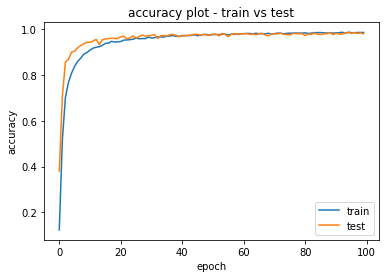

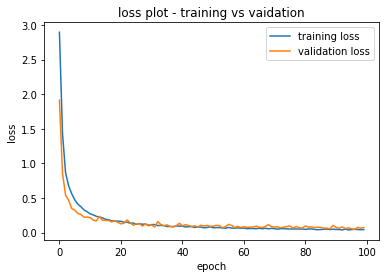

In [6]:
#Accuracy Plot
plt.plot(model_hist.history["accuracy"])
plt.plot(model_hist.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#Loss Plot
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
model_json = model.to_json()
with open("SLR98-100.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved as json')
model.save_weights('SLR98_100-wt.h5')
print('Weights saved')
model.save("SLR98_100.h5")
print("Model Saved as h5")

Model Saved as json
Weights saved
Model Saved as h5
